# SciPy - Optimize, Fourier, ND Image

- This tutorial is about a library called scipy which contains functions for doing scientific calculations on the data we give it.
- Official SciPy Docs
    - {{https://docs.scipy.org/doc/scipy/reference/index.html}}
- SciPy is a library of modules, and we can use different modules for different types of math / calculations.
    - For example, there are modules for statistics (scipy.stats), linear algebra (scipy.linalg), etc.


## Interpolate

- This is a module for interpolating data.
- Interpolation vs Extrapolation.
    - Extrapolation is predicting data OUTSIDE our data set.
        - This is when we take a data set, and make a prediction.
        - Values are estimated and have a probability associated with them.
    - Interpolation is predicting data IN BETWEEN our data points.
        - This is when we take a data set, attempt to make a best fit line, and then try to find a data point that would lie on that line WITHIN our data set.
        - Values are estimated but are more likely to be correct than extrapolated data.

In [113]:
import numpy as np
import matplotlib.pyplot as plt

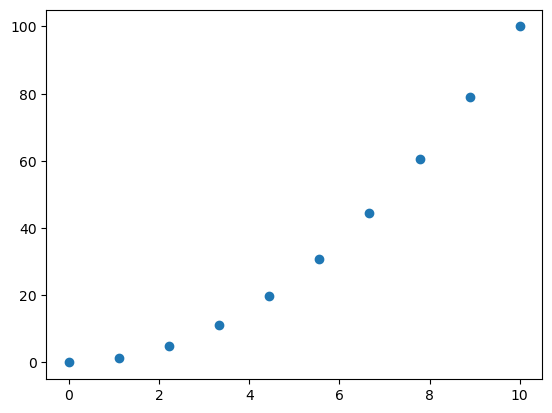

In [114]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [115]:
from scipy.interpolate import interp1d

- Here we are making a new function "f" that will take a value "x" and return a value "y" with a 1 dimensional interpolation of type "linear".
    - Note that we have a linear kind of interpolation but the graph is quadratic.
    - This is because after generating the linear data set new_x is an interpolation of the data set "x" which is linear.
    - "y" is generated from the equation "y = x**2". We then interpolate this relationship, create a best fit equation and use this to generate our result.
- Then we make a "new_x" and make it 30 evenly spaced values between 0 and 10.
- Last, we pass the "new_x" through the interpolation function and generate a new set of y values and save them as "result".

In [116]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

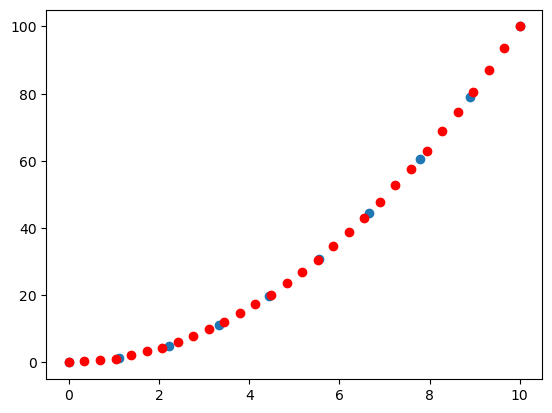

In [117]:
plt.scatter(x, y)
plt.scatter(new_x, result, c="r")

- As an example of using a non-linear data set we can make "y" equal to sine of "x".

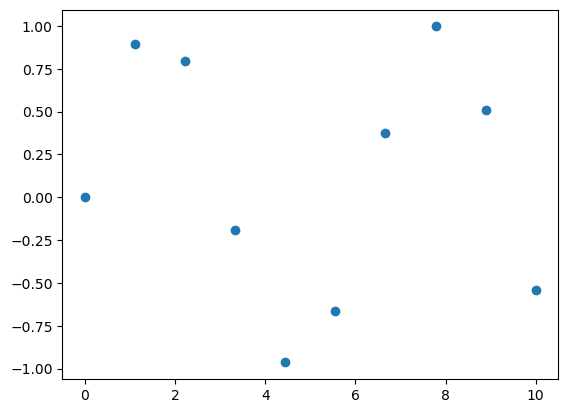

In [118]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

- Similarly, we can interpolate the data to fit in a cubic arangement.
- Try changing this cubic to linear and see what it looks like.

In [119]:
f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

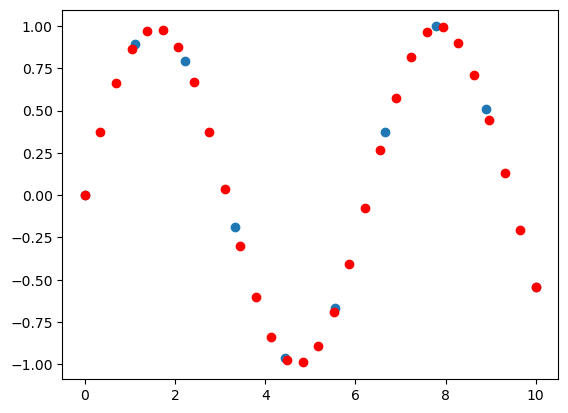

In [120]:
plt.scatter(x, y)
plt.scatter(new_x, result, c="r")

- There are several other kinds of fit equations you can use and even 2d interpolations as well. Explore the SciPy docs to learn more.

## Optimize

- With this section, we're going to look at making best fit lines for scatter data.
- Below, we generate some random data with multiple types of operations.

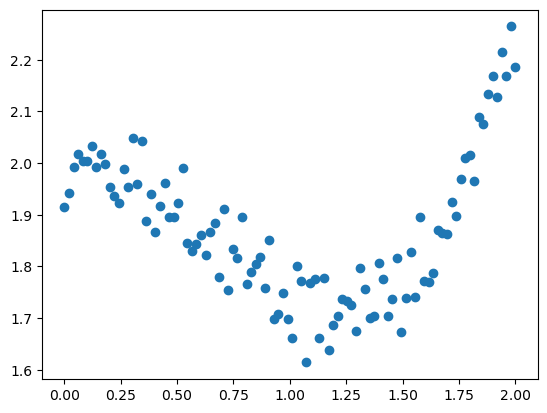

In [121]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

- We can define a function "f" and set up a arithmetic expression.
- Below, we are creating a polynomial expression.

In [122]:
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [123]:
from scipy import optimize

- We pass to the curve_fit method the model we want to use ("f" from above), our data set "x", and the data set we're comparing it to "y". 
- The output is 2 arrays of data.
    - The first array is the different parameters for our model, each corresponding to a variable (a, b, c, and d).
    - The second array is a table of co-variances of our model.
        - I don't totally understand what these co-variances are for, and the instructor said they aren't important to understand for this exercise. 

In [124]:
params, param_cov = optimize.curve_fit(f, x, y)
print("params:\n", params)
print("param_cov:\n", param_cov)
a, b, c, d = params

params:
 [ 0.38208549 -0.76166995  0.14110527  1.97899333]
param_cov:
 [[ 0.00097772 -0.00293315  0.00233475 -0.00037932]
 [-0.00293315  0.00905574 -0.00751682  0.00130708]
 [ 0.00233475 -0.00751682  0.00667014 -0.00131376]
 [-0.00037932  0.00130708 -0.00131376  0.00035218]]


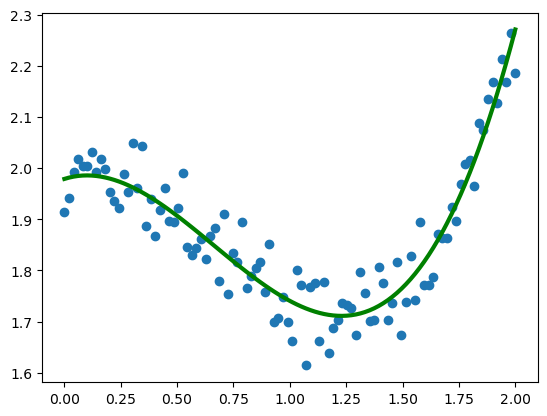

In [125]:
plt.scatter(x, y)
plt.plot(x, f(x, a, b, c, d), c="g", lw=3)

## Minimize

- Minimisation is good for finding local and global minimums in your data.
- Below we're starting with a modified sine function to show a graph with multiple local minimums.

In [126]:
def f (x):
    return x**2 + 15*np.sin(x)

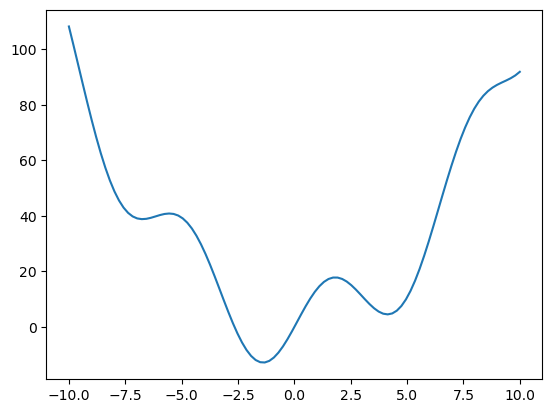

In [127]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

- To start the minimization, we feed the function into the minimize method as well as a starting x point.
- This returns scipy OptimizeResult object that contains information on the result.

In [128]:
result = optimize.minimize(f, x0=-8)
print(result)
print("\n\nLocal minimum found: ", result["x"][0])

      fun: 38.81120617595851
 hess_inv: array([[0.11637184]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.73789948])


Local minimum found:  -6.737899475953556


- Note that the return of the x is the x coordinate where we should expect to find the minimum. However, this is a local minimum.
- If we want a global minimum we can simply move the starting x position "x0" to another starting location.
    - This solution works for this particular graph, but the instructor doesn't go over how to find a global minimum generally.
- Below, we demonstrate changing the starting point as well as plotting them on the graph.

In [129]:
x0=-5
result = optimize.minimize(f, x0=x0).x

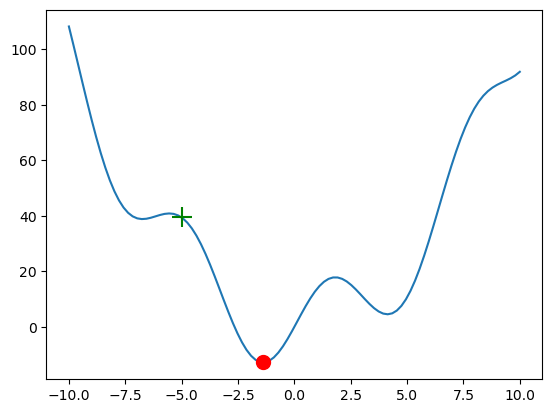

In [130]:
plt.plot(x, f(x), zorder=-1)
plt.scatter(result, f(result), s=100, c="r", zorder=1)
plt.scatter(x0, f(x0), s=200, marker="+", c="g", zorder=1)

- We can do minimize functions for 3d plots as well.
- We begin by defining f(x) as a complex single variable expession.
- Then we make 2 line spaces between -3 and 3 with 100 points and call then x and y.
- Then we use them to make a numpy meshgrid object.
- Last we pass the x and y linspace as well as the x, y meshgrid object passed through the f function through the contour method which gives us a nice contour plot. 
    - The 20 increases the number of lines on our contour plot.

In [131]:
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

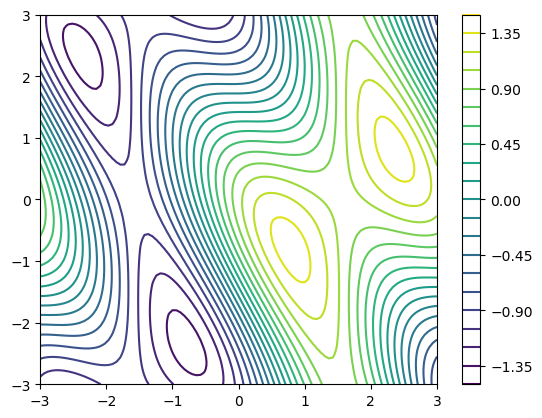

In [132]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)
plt.colorbar()

- Starting with this plot, if we want to find the minimum we need to start by making our starting point.
- This can be done with x0 variable again, but this time, we initialize it with the zeros method to make a 2, 1 array of 0's.
- Next, we draw our contour plot, same as above.
- Then we plot our x0 on the plot with the scatter method.
    - Scatter takes the following parameters (x coord, y coord, marker shape, color, size)
- Next, we call the optimize mathod on our data, passing it the function "f".
    - This returns a dictionary, so we use the dot notation to save the value of key "x" to the "result" variable.
- Last we plot the result.

[-0.78539917 -2.35619341]


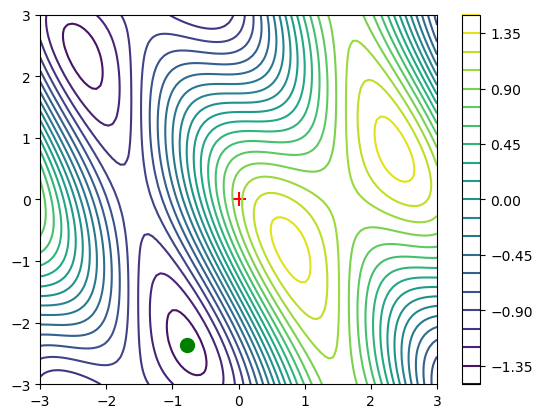

In [133]:
x0 = np.zeros((2, 1))
# Draw the contour plot.
plt.contour(x, y, f(np.array([x, y])), 20)
plt.colorbar()
# Plot the staring point.
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100)
# Call minimize to find our local minimum. Save value with key of "x" to result.
result = optimize.minimize(f, x0=x0).x
# Plot result.
plt.scatter(result[0], result[1], c="g", s=100)
print(result)

## Signal / FFT

- 2 interesting modules in scipy:
    - scipy.signal
        - Used for signal processing.
    - scipy.fftpack
        - Used for Fourier Transforms.

- We start with a plot of some semi-random data that trends upward.
- Our goal is to eliminate the linear trend from the data.

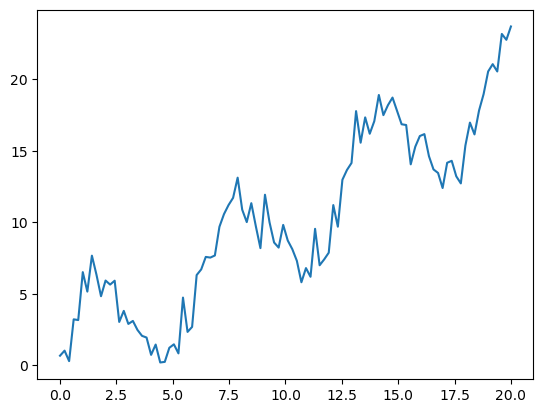

In [134]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [135]:
from scipy import signal

- Below we take our y data and pass it through detrend which attempts to remove the linear trend from the data.
- If you'd like to read up on linear trend here are a few links:
    - {{https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html}}
    - {{https://en.wikipedia.org/wiki/Linear_trend_estimation}}

In [136]:
new_y = signal.detrend(y)

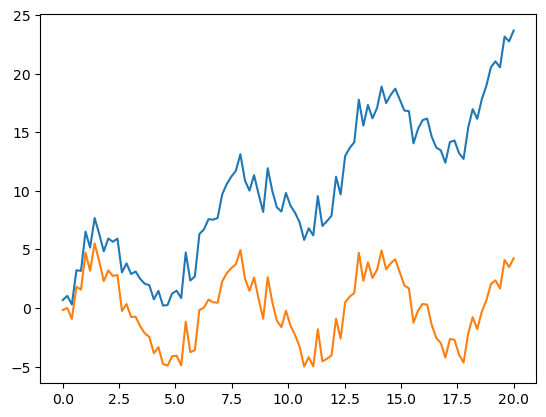

In [137]:
plt.plot(x, y)
plt.plot(x, new_y)

- Fourier transform is a mathematical technique that allows us to extract and analyze the frequencies that are present in periodic signals.
- In order to do this, we have 2 methods in the fftpack module to help us.
    - fftpack.fft(signal) gives us the power. (fft = fast fourier transform)
    - fftpack.fftfreq(signal.size) gives us the frequency.

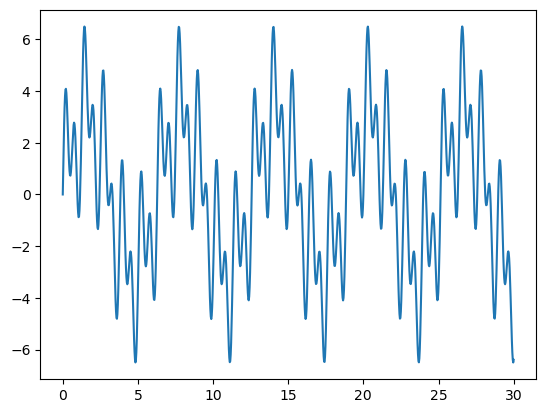

In [138]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*(np.sin(5*x) + np.sin(10*x))
plt.plot(x, y)

In [139]:
from scipy import fftpack

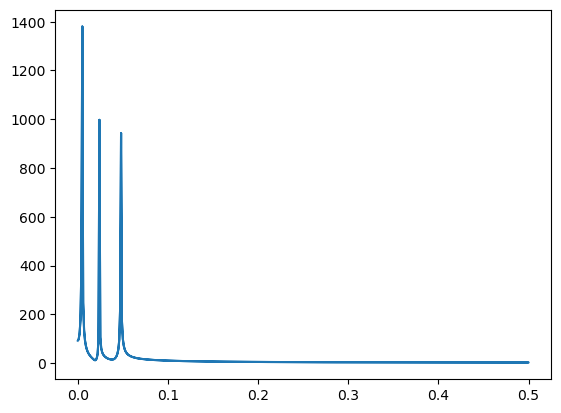

In [140]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequencies = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequencies), power)

- At this point, I'm a little lost because, I generally what a fourier transform, is but not how it's useful.
- According to the instructor, we can use this to "filter" a signal.

#### Filtering a Signal with Fourier Transforms

- There are 3 step to filter a signal with fourier transforms.
    - First, we do as above
    - Second, we clean the data using a mask to eliminate data under a certain threshold.
    - Third we transform the cleaned data back into a signal.

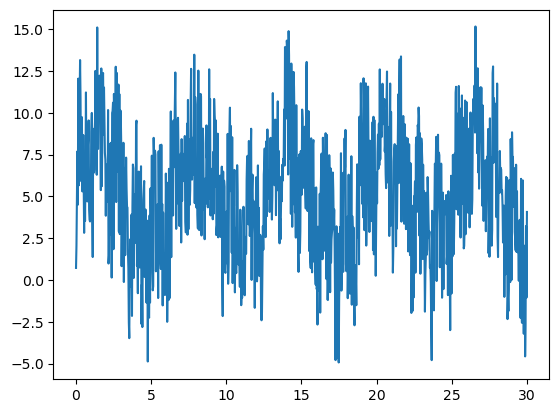

In [141]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

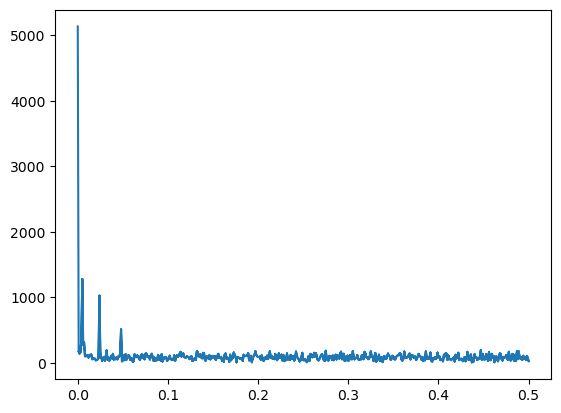

In [142]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequencies = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequencies), power)

- Now we have a spectrum and we need to filter it.
- All we do is eliminate all the data under a certain level.
- To do this, we iterate through all the data (with the = operator) and set every value under 400 equal to 0.

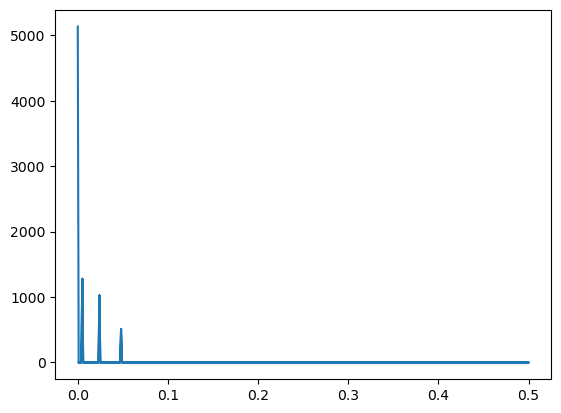

In [143]:
fourier[power<400] = 0
plt.plot(np.abs(frequencies), np.abs(fourier))

- Now that we have a cleaned spectrum, we can do an inverse fourier transform to get our signal back.
- To do this, we can use the method ifft (inverse fast fourier transform)

In [144]:
filtered_signal = fftpack.ifft(fourier)

- Now we just plot the results.
- Here we are plotting over the original to show the difference.

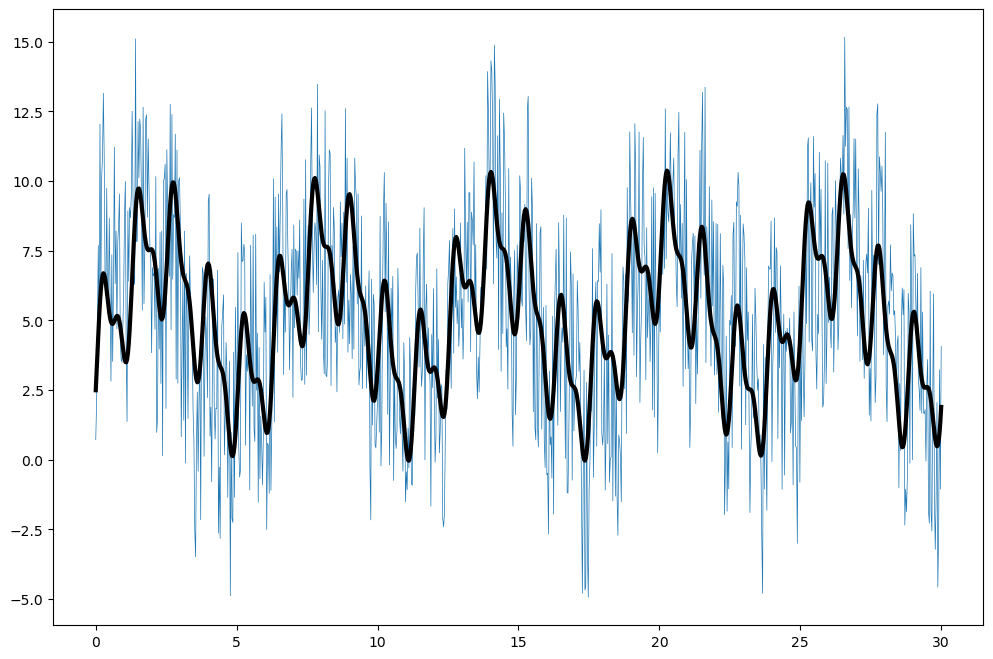

In [145]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5)
plt.plot(x, filtered_signal, lw=3, c="black")
plt.show()

## ND Image

- Stands for N dimensional Image.
- Here is a link to further info on this module:
    - {{https://docs.scipy.org/doc/scipy/reference/ndimage.html}}
- Of interest of us is the section on morphology.


- For the morphology section, we start with a structure which is normally a cross 3 pixels high and 3 pixels across.
    [ ][X][ ]
    [X][X][X]
    [ ][X][ ]
- We use this structure and guide it across the entire image.
- The center X is the origin and we scan with this.
- When the center X of the structure touches a certain color it does an operation on the matrix. 
    - This could be changing the color, etc
    - It does this for the entire structure, not just the center X.
- This method is used in certain algorithms to lift certain artifacts out of images.

In [146]:
from scipy import ndimage

- With this, we can start with an image that has a little bit of noise in it.

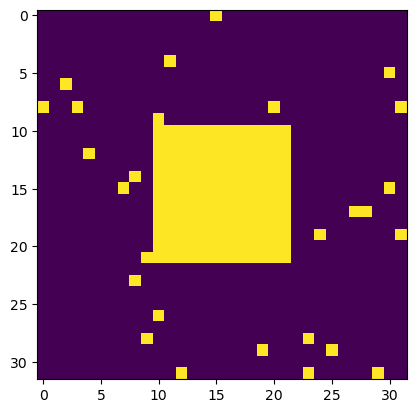

In [147]:
np.random.seed(101)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

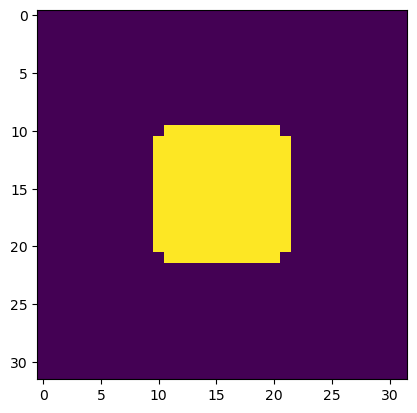

In [148]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

- Note that we did lose a little bit of information on the corners of the square.

#### Application of NDImage

- We can use this technique of transformation to manipulate our input data for easier counting.
- To import our own images into MatPlotLib we can use the method:
    - imread("filename.png")
- Originally, there was a z dimension with value of 4 indicating other colors in the image.
    - We can use slicing to reduce the z axis to 1 plane only giving us a simple black and white image.

(438, 467)

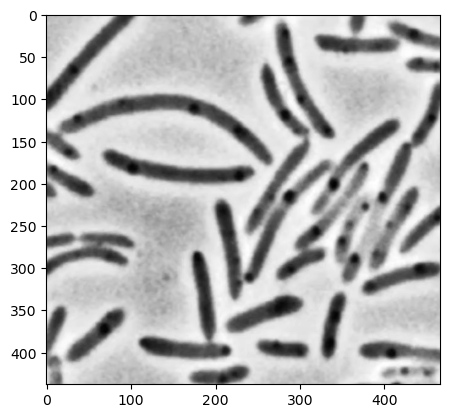

In [149]:
image = plt.imread("bacteria.png")
image = image[:, :, 0]
plt.imshow(image, cmap="gray")
image.shape

- First we want to separate the bacteria from the background.
- To do this, we will use boolean indexing.
- We can make a copy of our image, and unravel the values, then pass it to a histogram so we can see the spectrum.
- This will make it easier to separate the background.

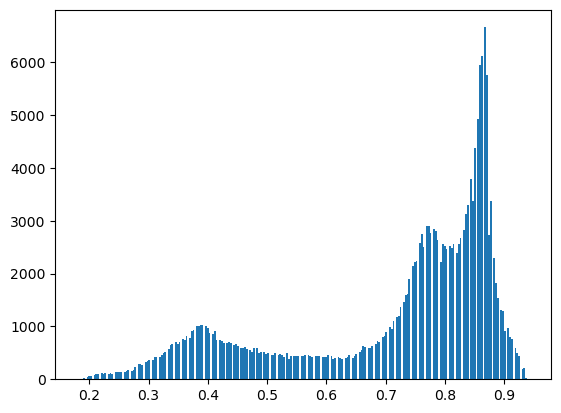

In [150]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

- Looking at this histograph, we see 3 peaks.
- From left to right, we have the darkest at about 0.4, a light gray at about 0.75, and light grey/white at around 0.85.
- We want the bacteria, so we want the darkest of the values.
- What we do is we use boolean indexing to keep all the values less than 0.6 ish because that looks like it's about a local minimum.
- When we do this, we get a mask, but this mask can serve as an image in itself.

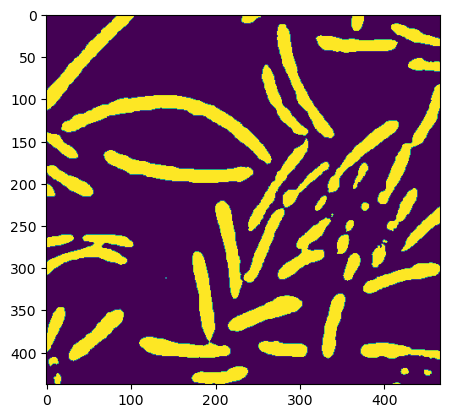

In [151]:
image = image < 0.55
plt.imshow(image)

- The problem with this however, is that the image is now can have little spots like at (150, 300) where we know this is the backgroud, but we have a little spot where the image was dark and now we need to clean it up.
- To do this, we can use the morphology code from before to help us clean this up.

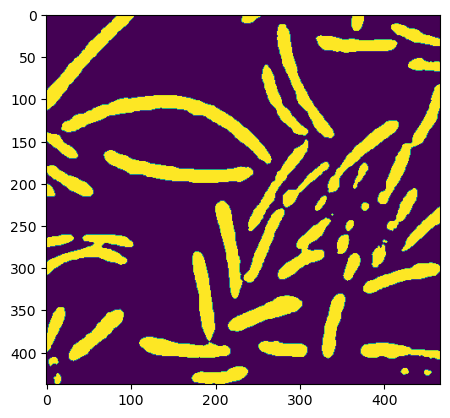

In [188]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

- Now we use another method in ndimage to analyse this image and label the segments it finds.
- the ndimage returns 2 values:
    - One is the image with colored regions ove each segment it found.
    - Two is the number of unique segments it found.
- Here we call the label method and unpack them into two variables.

47


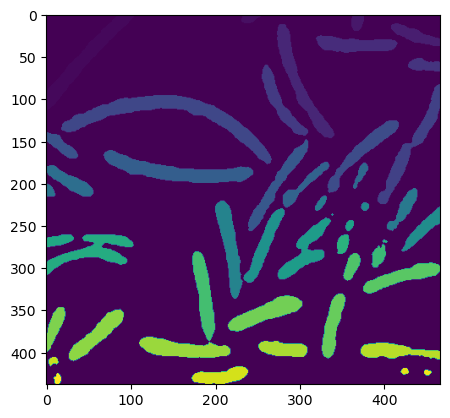

In [191]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)
plt.imshow(label_image)

- Last, we use another method called sum that lets us count the size of each bacteria in our picture.
    - We get an nd array that we can then feed to a scatter plot. 

In [192]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

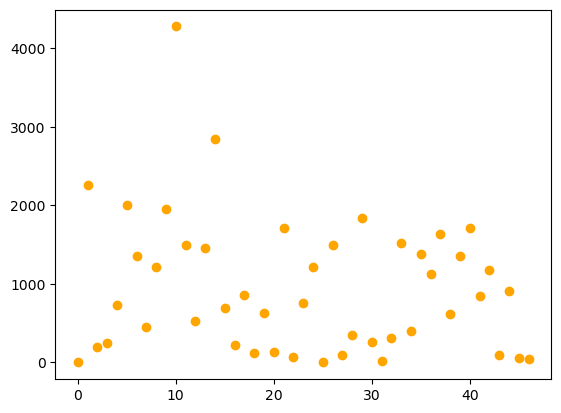

In [196]:
plt.scatter(range(n_labels), sizes, c="orange")
